# Imports

In [1]:
import pandas as pd
import requests
import json
import matplotlib

In [2]:
params = {
    'token': 'p.eyJ1IjogImYxNDQzM2QxLWJhZWEtNGM5MC04ZDc1LWIxNmJiZDBkM2NjZSIsICJpZCI6ICI2NGRlZmY5Mi0xMDcyLTQ3MDYtOTQ0My02ODM1ZjE0NDE1ZGYifQ.ANDdHelFCeqlBZO9lmVxeSjrGBbW2y1ZFMVHBfEht44'
}
# The query returns 100K rows just to do a preliminary exploratory analysis
url = f'https://api.tinybird.co/v0/pipes/nyc_taxi_zone_clean_pipe.json'
response = requests.get(url, params=params)
stream = response.json()

In [3]:
#f_stat = open(r'./stations.json')
#stat_json = json.load(f_stat)
df_stats = pd.json_normalize(stream, record_path=['data']) # normalize because of the nested list/dicts
#f_stat.close() # close file descriptor
df_stats.info()
# change to datetime pickup and dropoff
#df_stats['trip_time'] = pd.to_numeric(df_stats['trip_time'] , errors='coerce' , downcast='integer')
df_stats['pickup_datetime'] = pd.to_datetime(df_stats['pickup_datetime'])
df_stats['dropoff_datetime'] = pd.to_datetime(df_stats['dropoff_datetime'])
df_stats['puzone'] = df_stats['puzone'].astype(str)
df_stats['dozone'] = df_stats['dozone'].astype(str)
df_stats = df_stats.dropna() # drop nulls
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pickup_datetime   100000 non-null  object 
 1   dropoff_datetime  100000 non-null  object 
 2   puzone            100000 non-null  object 
 3   dozone            100000 non-null  object 
 4   trip_time         100000 non-null  int64  
 5   z_time            100000 non-null  float64
 6   passenger_count   100000 non-null  int64  
 7   z_passenger       100000 non-null  float64
 8   trip_distance     100000 non-null  float64
 9   z_trip            100000 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   pickup_datetime   100000 no

array([[<AxesSubplot:title={'center':'trip_distance'}>]], dtype=object)

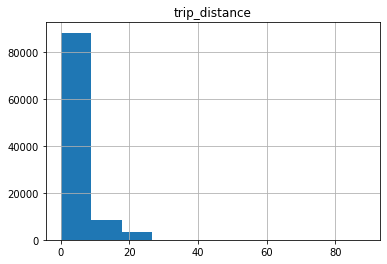

In [4]:
df_stats.hist(column='trip_distance') #Histogram